In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import folium
import seaborn as sns

sns.set()

## Let's have a look at the data:


Select location ('munich', 'boston' or 'hawai') and load the files:

In [6]:
LOCATION = 'munich'

df_list = pd.read_csv(LOCATION + '/listings.csv.gz')
df_reviews = pd.read_csv(LOCATION + '/reviews.csv.gz')
df_cal = pd.read_csv(LOCATION + '/calendar.csv.gz')

df_list_sum = pd.read_csv(LOCATION + '/listings.csv')
df_reviews_sum = pd.read_csv(LOCATION + '/reviews.csv')
df_neib_sum = pd.read_csv(LOCATION + '/neighbourhoods.csv')

In [7]:
pd.options.display.max_rows=10
pd.options.display.max_columns=None
pd.options.display.max_colwidth=30

### Check data about listings

In [8]:
df_list

id                    listing_url       scrape_id last_scraped  \
0        97945  https://www.airbnb.com/roo...  20210322162337   2021-03-23   
1       114695  https://www.airbnb.com/roo...  20210322162337   2021-04-02   
2       127383  https://www.airbnb.com/roo...  20210322162337   2021-04-01   
3       159634  https://www.airbnb.com/roo...  20210322162337   2021-03-23   
4       170154  https://www.airbnb.com/roo...  20210322162337   2021-04-02   
...        ...                            ...             ...          ...   
5068  48761022  https://www.airbnb.com/roo...  20210322162337   2021-03-23   
5069  48778478  https://www.airbnb.com/roo...  20210322162337   2021-03-23   
5070  48780743  https://www.airbnb.com/roo...  20210322162337   2021-04-01   
5071  48780981  https://www.airbnb.com/roo...  20210322162337   2021-03-23   
5072  48797828  https://www.airbnb.com/roo...  20210322162337   2021-03-23   

                               name                    description  \
0     Deluxw-Apartm. with roof t...  <b>The space</b><br />We o...   
1     Apartment Munich/East with...  <b>The space</b><br />It´s...   
2     City apartment next to Pin...  <b>The space</b><br />My c...   
3     Fancy, bright central roof...  <b>The space</b><br />The ...   
4     Own floor & bath, parking ...  Enjoy a quiet neighbourhoo...   
...                             ...                            ...   
5068  Luxury Designer Apartment ...  The apartment is located w...   
5069  Apartment with Balcony in ...  Studio with balcony in cen...   
5070  Wunderschöne Wohnung in de...  <b>The space</b><br />Voll...   
5071  Entire apartment in the be...  Entire apartment in the be...   
5072  Fully- furnished, central ...  Central apartment in Munic...   

              neighborhood_overview                    picture_url    host_id  \
0     We are living in a outskir...  https://a0.muscache.com/pi...     517685   
1                               NaN  https://a0.muscache.com/pi...     581737   
2                               NaN  https://a0.muscache.com/pi...     630556   
3     Very quiet, green, squirre...  https://a0.muscache.com/pi...     765694   
4                               NaN  https://a0.muscache.com/pi...     108297   
...                             ...                            ...        ...   
5068  The street here is very al...  https://a0.muscache.com/pi...    5265984   
5069                            NaN  https://a0.muscache.com/pi...   54142901   
5070  Super zentral, alles zu Fu...  https://a0.muscache.com/pi...  317502651   
5071                            NaN  https://a0.muscache.com/pi...  161107012   
5072                            NaN  https://a0.muscache.com/pi...   48130242   

                           host_url   host_name  host_since  \
0     https://www.airbnb.com/use...    Angelika  2011-04-18   
1     https://www.airbnb.com/use...     Stephan  2011-05-12   
2     https://www.airbnb.com/use...       Sonja  2011-05-26   
3     https://www.airbnb.com/use...       Sanna  2011-07-01   
4     https://www.airbnb.com/use...        Alex  2010-04-14   
...                             ...         ...         ...   
5068  https://www.airbnb.com/use...      Daniel  2013-02-28   
5069  https://www.airbnb.com/use...      Silvia  2016-01-10   
5070  https://www.airbnb.com/use...  Maximilian  2019-12-14   
5071  https://www.airbnb.com/use...         Til  2017-12-03   
5072  https://www.airbnb.com/use...     Silvana  2015-11-04   

                      host_location                     host_about  \
0           Munich, Bayern, Germany  Ich freue mich auf viele i...   
1           Munich, Bayern, Germany  I am looking forward to me...   
2           Munich, Bayern, Germany  Hi, mein Name ist Sonja un...   
3           Munich, Bayern, Germany  outdoorsy sportive Person ...   
4           Munich, Bayern, Germany  We love to travel and drea...   
...                             ...                            ...   
5068       Mun

In [9]:
df_list_sum

id                           name    host_id   host_name  \
0        97945  Deluxw-Apartm. with roof t...     517685    Angelika   
1       114695  Apartment Munich/East with...     581737     Stephan   
2       127383  City apartment next to Pin...     630556       Sonja   
3       159634  Fancy, bright central roof...     765694       Sanna   
4       170154  Own floor & bath, parking ...     108297        Alex   
...        ...                            ...        ...         ...   
5068  48761022  Luxury Designer Apartment ...    5265984      Daniel   
5069  48778478  Apartment with Balcony in ...   54142901      Silvia   
5070  48780743  Wunderschöne Wohnung in de...  317502651  Maximilian   
5071  48780981  Entire apartment in the be...  161107012         Til   
5072  48797828  Fully- furnished, central ...   48130242     Silvana   

      neighbourhood_group          neighbourhood  latitude  longitude  \
0                     NaN                 Hadern  48.11476   11.48782   
1                     NaN           Berg am Laim  48.12071   11.63758   
2                     NaN            Maxvorstadt  48.15199   11.56482   
3                     NaN     Pasing-Obermenzing  48.13898   11.46612   
4                     NaN      Sendling-Westpark  48.10814   11.52733   
...                   ...                    ...       ...        ...   
5068                  NaN         Altstadt-Lehel  48.13442   11.58123   
5069                  NaN  Neuhausen-Nymphenburg  48.14534   11.54116   
5070                  NaN         Altstadt-Lehel  48.13545   11.57980   
5071                  NaN            Bogenhausen  48.14090   11.60640   
5072                  NaN          Au-Haidhausen  48.12652   11.58781   

            room_type  price  minimum_nights  number_of_reviews last_review  \
0     Entire home/apt     80               2                129  2019-10-03   
1     Entire home/apt     95               2                 53  2019-10-06   
2     Entire home/apt     99               2                 94  2020-12-30   
3     Entire home/apt     52               5                 34  2020-12-23   
4        Private room     55               2                478  2020-11-13   
...               ...    ...             ...                ...         ...   
5068  Entire home/apt    120               1                  0         NaN   
5069  Entire home/apt     52              14                  0         NaN   
5070  Entire home/apt     68               7                  0         NaN   
5071  Entire home/apt     56              10                  0         NaN   
5072  Entire home/apt     30               1                  0         NaN   

      reviews_per_month  calculated_host_listings_count  availability_365  
0                  1.12                              2                  5  
1                  0.45                              2                169  
2                  0.79                              1                  0  
3                  0.29                              1                  0  
4                  4.12                              1                275  
...                 ...                            ...                ...  
5068                NaN                              1                340  
5069                NaN                              1                 55  
5070                NaN                              1                 62  
5071                NaN                              1                325  
5072                NaN                              1                320  

[5073 rows x 16 columns]

#### Is there something in the listings_summary what is not in listings?

In [10]:
set(df_list_sum.columns) - set(df_list.columns)

{'neighbourhood_group'}

In [11]:
df_list_sum['neighbourhood_group'].isnull().all()

True

The difference is **neighbourhood_group** but we can ignore it, it has no values.

#### Plot a map for all listings in the city:

In [12]:
coords=df_list[['latitude', 'longitude']].values.tolist()
loc_map = folium.Map(location=[df_list['latitude'].median(), df_list['longitude'].median()], zoom_start=11, tiles='cartodbpositron', width=640, height=480)
[folium.CircleMarker(coords[i], radius=0.0001, color='#0080bb').add_to(loc_map) for i in range(len(coords))]
loc_map

### Check the neighbourhood:

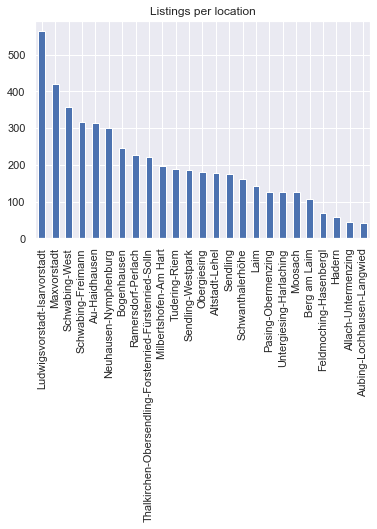

In [13]:
df_list['neighbourhood_cleansed'].value_counts().plot(kind='bar', title='Listings per location');

### What kind of accomodation do we have?

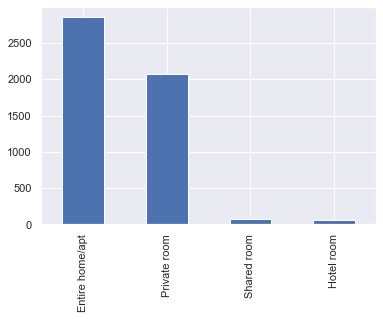

In [14]:
df_list['room_type'].value_counts().plot(kind='bar');

#### Most common property types:

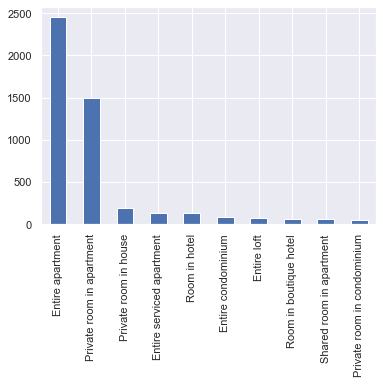

In [15]:
df_list['property_type'].value_counts()[:10].plot(kind='bar');

#### Least common property types. An adventure in the city?

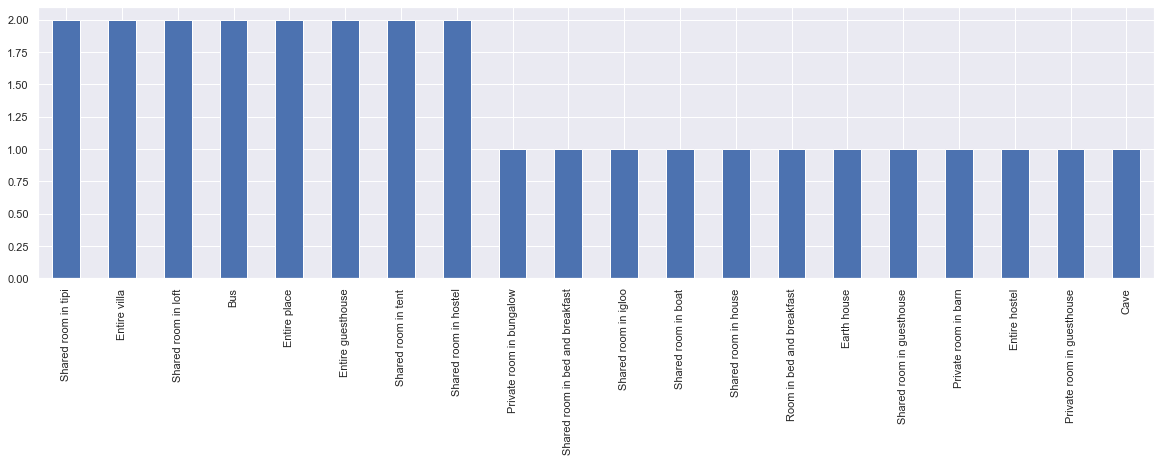

In [16]:
df_list['property_type'].value_counts()[-20:].plot(kind='bar', figsize=(20, 5));

**Yes, an earth house, a bus, a cave or a shared room in boat is something special indeed.**

### Check data about reviews

In [17]:
df_reviews

listing_id         id        date  reviewer_id       reviewer_name  \
0            97945     591337  2011-10-03       508190              Lauren   
1            97945     796084  2011-12-20       341171      Marty & Evelyn   
2            97945     964528  2012-03-02      1647967                 Sue   
3            97945    1353862  2012-05-26      2414638      Mel And George   
4            97945    1375610  2012-05-29      2323197               Anais   
...            ...        ...         ...          ...                 ...   
108237    48484031  738253130  2021-03-12     77190130              Thomas   
108238    48484031  740251194  2021-03-19    390516249         Elena Alina   
108239    48616567  742587243  2021-03-27    223550017  Masirullah Japaroo   
108240    48652509  740916531  2021-03-21     32192964                Joel   
108241    48707270  740919089  2021-03-21    393028570                Luis   

                             comments  
0       We very much enjoyed stayi...  
1       Angelika was a very gracio...  
2       The apartment was beautifu...  
3       We loved the warm welcome ...  
4       Dès notre arrivée, notre h...  
...                               ...  
108237           Alles war wunderbar.  
108238  It was very good very clea...  
108239  Sehr Gastfreundlich und re...  
108240  Reibungsloser Austausch vo...  
108241  Spacious, nice, some furni...  

[108242 rows x 6 columns]

In [18]:
df_reviews_sum

listing_id        date
0            97945  2011-10-03
1            97945  2011-12-20
2            97945  2012-03-02
3            97945  2012-05-26
4            97945  2012-05-29
...            ...         ...
108237    48484031  2021-03-12
108238    48484031  2021-03-19
108239    48616567  2021-03-27
108240    48652509  2021-03-21
108241    48707270  2021-03-21

[108242 rows x 2 columns]

In [19]:
set(df_reviews_sum.columns) - set(df_reviews.columns)

set()

#### What is the reviews distrution over all users?

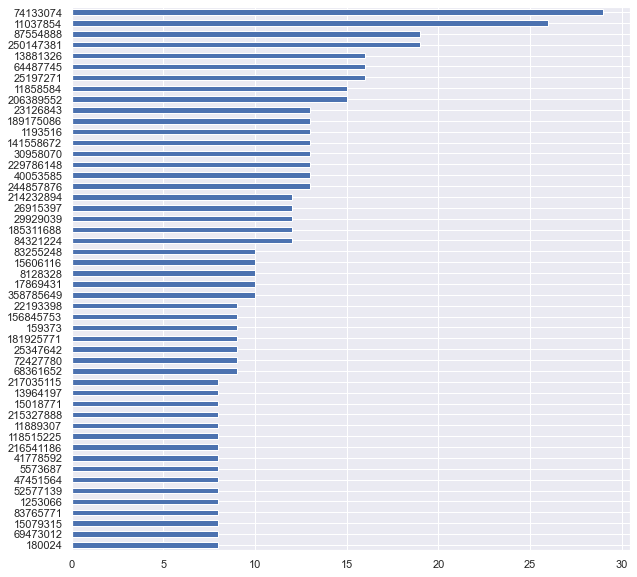

In [20]:
df_reviews['reviewer_id'].value_counts()[0:50].sort_values(ascending=True).plot.barh(figsize=(10, 10));

#### We have apparently some users giving more reviews than others but nothing special and no outliers.

### Look into calendar

In [21]:
df_cal

listing_id        date available    price adjusted_price  \
0              5269  2021-04-16         f  $200.00        $200.00   
1             13933  2021-04-17         t  $200.00        $200.00   
2             13933  2021-04-18         f  $200.00        $200.00   
3             13933  2021-04-19         f  $200.00        $200.00   
4             13933  2021-04-20         f  $200.00        $200.00   
...             ...         ...       ...      ...            ...   
8405732    48546586  2022-04-10         t  $269.00        $269.00   
8405733    48546586  2022-04-11         t  $269.00        $269.00   
8405734    48546586  2022-04-12         t  $269.00        $269.00   
8405735    48546586  2022-04-13         t  $269.00        $269.00   
8405736    48546586  2022-04-14         t  $269.00        $269.00   

         minimum_nights  maximum_nights  
0                   3.0           200.0  
1                   2.0          1125.0  
2                   2.0          1125.0  
3                   1.0          1125.0  
4                   1.0          1125.0  
...                 ...             ...  
8405732             1.0          1125.0  
8405733             1.0          1125.0  
8405734             1.0          1125.0  
8405735             1.0          1125.0  
8405736             1.0          1125.0  

[8405737 rows x 7 columns]

#### Do all listings have a calendar?

In [22]:
len(df_list['id'].drop_duplicates()) == len(df_cal['listing_id'].drop_duplicates())

False

#### Listings with missing caledar (if ^^ is *False*):

In [29]:
diff = set(df_list['id'].drop_duplicates()) - set(df_cal['listing_id'].drop_duplicates())


In [24]:
df_list[df_list['id'].isin(diff)]

id                    listing_url       scrape_id last_scraped  \
0        97945  https://www.airbnb.com/roo...  20210322162337   2021-03-23   
1       114695  https://www.airbnb.com/roo...  20210322162337   2021-04-02   
2       127383  https://www.airbnb.com/roo...  20210322162337   2021-04-01   
3       159634  https://www.airbnb.com/roo...  20210322162337   2021-03-23   
4       170154  https://www.airbnb.com/roo...  20210322162337   2021-04-02   
...        ...                            ...             ...          ...   
5068  48761022  https://www.airbnb.com/roo...  20210322162337   2021-03-23   
5069  48778478  https://www.airbnb.com/roo...  20210322162337   2021-03-23   
5070  48780743  https://www.airbnb.com/roo...  20210322162337   2021-04-01   
5071  48780981  https://www.airbnb.com/roo...  20210322162337   2021-03-23   
5072  48797828  https://www.airbnb.com/roo...  20210322162337   2021-03-23   

                               name                    description  \
0     Deluxw-Apartm. with roof t...  <b>The space</b><br />We o...   
1     Apartment Munich/East with...  <b>The space</b><br />It´s...   
2     City apartment next to Pin...  <b>The space</b><br />My c...   
3     Fancy, bright central roof...  <b>The space</b><br />The ...   
4     Own floor & bath, parking ...  Enjoy a quiet neighbourhoo...   
...                             ...                            ...   
5068  Luxury Designer Apartment ...  The apartment is located w...   
5069  Apartment with Balcony in ...  Studio with balcony in cen...   
5070  Wunderschöne Wohnung in de...  <b>The space</b><br />Voll...   
5071  Entire apartment in the be...  Entire apartment in the be...   
5072  Fully- furnished, central ...  Central apartment in Munic...   

              neighborhood_overview                    picture_url    host_id  \
0     We are living in a outskir...  https://a0.muscache.com/pi...     517685   
1                               NaN  https://a0.muscache.com/pi...     581737   
2                               NaN  https://a0.muscache.com/pi...     630556   
3     Very quiet, green, squirre...  https://a0.muscache.com/pi...     765694   
4                               NaN  https://a0.muscache.com/pi...     108297   
...                             ...                            ...        ...   
5068  The street here is very al...  https://a0.muscache.com/pi...    5265984   
5069                            NaN  https://a0.muscache.com/pi...   54142901   
5070  Super zentral, alles zu Fu...  https://a0.muscache.com/pi...  317502651   
5071                            NaN  https://a0.muscache.com/pi...  161107012   
5072                            NaN  https://a0.muscache.com/pi...   48130242   

                           host_url   host_name  host_since  \
0     https://www.airbnb.com/use...    Angelika  2011-04-18   
1     https://www.airbnb.com/use...     Stephan  2011-05-12   
2     https://www.airbnb.com/use...       Sonja  2011-05-26   
3     https://www.airbnb.com/use...       Sanna  2011-07-01   
4     https://www.airbnb.com/use...        Alex  2010-04-14   
...                             ...         ...         ...   
5068  https://www.airbnb.com/use...      Daniel  2013-02-28   
5069  https://www.airbnb.com/use...      Silvia  2016-01-10   
5070  https://www.airbnb.com/use...  Maximilian  2019-12-14   
5071  https://www.airbnb.com/use...         Til  2017-12-03   
5072  https://www.airbnb.com/use...     Silvana  2015-11-04   

                      host_location                     host_about  \
0           Munich, Bayern, Germany  Ich freue mich auf viele i...   
1           Munich, Bayern, Germany  I am looking forward to me...   
2           Munich, Bayern, Germany  Hi, mein Name ist Sonja un...   
3           Munich, Bayern, Germany  outdoorsy sportive Person ...   
4           Munich, Bayern, Germany  We love to travel and drea...   
...                             ...                            ...   
5068       Mun

Listings in the list above are **possibly out of order**.

#### Calendar can provide a value to figure our, if the prices are the same over the whole year. Let's have a look at it later.

## Check the neighbourhood data

In [25]:
df_neib_sum

neighbourhood_group                  neighbourhood
0                   NaN            Allach-Untermenzing
1                   NaN                 Altstadt-Lehel
2                   NaN     Aubing-Lochhausen-Langwied
3                   NaN                  Au-Haidhausen
4                   NaN                   Berg am Laim
..                  ...                            ...
20                  NaN                       Sendling
21                  NaN              Sendling-Westpark
22                  NaN  Thalkirchen-Obersendling-F...
23                  NaN                  Tudering-Riem
24                  NaN        Untergiesing-Harlaching

[25 rows x 2 columns]

In [26]:
df_neib_sum['neighbourhood'].drop_duplicates()

0               Allach-Untermenzing
1                    Altstadt-Lehel
2        Aubing-Lochhausen-Langwied
3                     Au-Haidhausen
4                      Berg am Laim
                  ...              
20                         Sendling
21                Sendling-Westpark
22    Thalkirchen-Obersendling-F...
23                    Tudering-Riem
24          Untergiesing-Harlaching
Name: neighbourhood, Length: 25, dtype: object

In [27]:
df_list['neighbourhood_cleansed'].drop_duplicates()

0                             Hadern
1                       Berg am Laim
2                        Maxvorstadt
3                 Pasing-Obermenzing
4                  Sendling-Westpark
                   ...              
67                          Sendling
69                    Altstadt-Lehel
79     Thalkirchen-Obersendling-F...
186                          Moosach
248       Aubing-Lochhausen-Langwied
Name: neighbourhood_cleansed, Length: 25, dtype: object

In [28]:
len(df_neib_sum['neighbourhood'].drop_duplicates()) == len(df_list['neighbourhood_cleansed'].drop_duplicates())

True

#### Summary: Nothing we don't have in listings as well.